<div style="text-align: center; font-size: 24px; font-weight: bold;">
    A Case Study on Customer Personality Analysis & Segmentation<br>
    <span style="font-size: 18px;">EDA | PCA | Clustering | Profiling</span>
</div>

>
>


### Import Necessaries Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.cluster as cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Project Objective

A retail company aims to improve its marketing strategy by gaining a deeper understanding of its customer base through comprehensive analysis. The objective is to identify **Distinct Customer Segments** based on various attributes, enabling the company to customize its products and marketing strategies more effectively.

### Data Description

The dataset contains information about customers, including demographic details, purchase history, and other relevant characteristics. Key attributes include:

**ID:** Customer's unique identifier.

**Year_Birth:** Customer's birth year.

**Education:** Education qualification of the customer.

**Marital_Status:** Marital status of the customer.

**Income:** Customer's yearly household income.

**Kidhome:** Number of children in the customer's household.

**Teenhome:** Number of teenagers in the customer's household.

**Dt_Customer:** Date of customer's enrollment with the company.

**Recency:** Number of days since the customer's last purchase.

Various **'Mnt'** columns **:** Amount spent on different product categories.

**NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases:** Number of purchases through different channels.

**NumWebVisitsMonth:** Number of web visits per month.

**AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5:** Customer's response to different marketing campaigns.

**Complain:** Whether the customer has lodged a complaint.

**Z_CostContact** and **Z_Revenue:** Cost and revenue associated with the customer contact.

**Response:** Indicating whether the customer responded to the latest marketing campaign.

#### Load the Dataset

In [10]:
file_path = r'C:\Users\sangl\Desktop\IvyProSchool\Python_Batch_APR_24\DataSets\marketing_campaign_.csv'
df = pd.read_csv(file_path)

### Data **Exploration** and **Manupulation**

In [12]:
from IPython.display import display

# Adjust the display setting to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(df.head(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [13]:
# Display information about the dataset
print(df.info())
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [14]:
# Shape of DataFrame
print("No. of Records in Original DataFrame :",df.shape[0])
print("No. of Features in Original DataFrame :",df.shape[1])

No. of Records in Original DataFrame : 2240
No. of Features in Original DataFrame : 29


In [15]:
# Droping Duplicate Records

print("No. of Non-Duplicate Records :",df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print("No. of Records after Deleting Duplicate Records :",len(df))

# There are NO Duplicate records in our DataFrame

No. of Non-Duplicate Records : False    2240
Name: count, dtype: int64
No. of Records after Deleting Duplicate Records : 2240


In [16]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]
print("Columns with missing values:", columns_with_missing)

# Print columns with missing values and their counts
for column in columns_with_missing:
    print(f"Column '{column}' has {df[column].isnull().sum()} missing values")

Columns with missing values: Index(['Income'], dtype='object')
Column 'Income' has 24 missing values


In [17]:
# Missing Value imputation : Strategy is Median Value

df['Income']=df['Income'].fillna(df['Income'].median())

In [18]:
# Checking Unique Values in each Column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

▨ A constant column in a DataFrame is a column where all the values are the same.
It is clear that **Z_CostContact** and **Z_Revenue** are Constant Columns and these columns has do not provide any useful information for analysis or    modeling   because they do not vary.

In [20]:
# Droping Z_CostContact and Z_Revenue columns from the DataFrame
df.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

print("After Droping the Constant Columns, the remaining Columns are :",df.columns)

After Droping the Constant Columns, the remaining Columns are : Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [21]:
# Convert the Dt_Customer column to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Extract year from the Dt_Customer column
# df['Year_Onboarding'] = df['Dt_Customer'].dt.year

#Dates of the newest and oldest recorded customer

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 
    
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [22]:
# Checking the Data Types of all Features
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

#### Feature Engineering

In [24]:
from datetime import datetime

# Define the fixed current date, assuming Current Date is 01-01-2015
fixed_current_date = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Number of days a customer was engaged with company
df['Engagement_Days'] = (fixed_current_date - df['Dt_Customer']).dt.days

# Adding a new feature "Age_Years" in the dataframe
df['Age_Years'] = 2015 - df["Year_Birth"]

# Adding new Feature Age_Classification based on Age of a customer
bins = [0, 25, 60, 100]
labels_age = ['Young-Adult', 'Adult', 'Senior']
df['Age_Classification'] = pd.cut(df['Age_Years'], bins=bins, labels=labels_age, right=False)

# Combining Different Features into a Single Feature to reduce the Number of Dimension

df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Cnt_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Adding new Feature Income_Classification based on Income of a customer
bins = [0, 25000, 85000, float('inf')]
labels_income = ['Low_Income', 'Middle_Income', 'High_Income']
df['Income_Classification'] = pd.cut(df['Income'], bins=bins, labels=labels_income, right=False)

# Concating Age_Classification and Income_Classification to create a New Feature
df['Cust_Description'] = df['Age_Classification'].astype(str) + "-" + df['Income_Classification'].astype(str)

# Segmenting 'Marital_Status' feature in two groups

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'In_Relation')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

# Adding a Feature for total members in the householde
df["Family_Size"] = df["Marital_Status"].replace({"Single": 1, "In_Relation":2})+ df["Total_Children"]

# Adding a Feature related to parenthood
df["Is_Parent"] = np.where(df.Total_Children> 0, 1, 0)

# Segmenting 'Education' feature in three groups
df["Education"]=df["Education"].replace(
    {"Basic":"UnderGraduate","2n Cycle":"UnderGraduate", "Graduation":"Graduate", "Master":"PostGraduate", "PhD":"PostGraduate"})

# Renaming some features
df=df.rename(
    columns=
    {"MntWines": "Expense_Wines","MntFruits":"Expense_Fruit","MntMeatProducts":"Expense_Meat",
     "MntFishProducts":"Expense_Fish","MntSweetProducts":"Expense_Sweets","MntGoldProds":"Expense_Gold"})


In [25]:
from IPython.display import display

# Adjust the display setting to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(df.head(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Expense_Wines,Expense_Fruit,Expense_Meat,Expense_Fish,Expense_Sweets,Expense_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Engagement_Days,Age_Years,Age_Classification,Total_Children,Total_Expenses,Total_AcceptedCmp,Cnt_Total_Purchases,Income_Classification,Cust_Description,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,849,58,Adult,0,1617,0,25,Middle_Income,Adult-Middle_Income,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,299,61,Senior,2,27,0,6,Middle_Income,Senior-Middle_Income,3,1
2,4141,1965,Graduate,In_Relation,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,498,50,Adult,0,776,0,21,Middle_Income,Adult-Middle_Income,2,0
3,6182,1984,Graduate,In_Relation,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,325,31,Adult,1,53,0,8,Middle_Income,Adult-Middle_Income,3,1
4,5324,1981,PostGraduate,In_Relation,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,347,34,Adult,1,422,0,19,Middle_Income,Adult-Middle_Income,3,1
5,7446,1967,PostGraduate,In_Relation,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,479,48,Adult,1,716,0,22,Middle_Income,Adult-Middle_Income,3,1
6,965,1971,Graduate,Single,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,779,44,Adult,1,590,0,21,Middle_Income,Adult-Middle_Income,2,1
7,6177,1985,PostGraduate,In_Relation,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,603,30,Adult,1,169,0,10,Middle_Income,Adult-Middle_Income,3,1
8,4855,1974,PostGraduate,In_Relation,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,574,41,Adult,1,46,0,6,Middle_Income,Adult-Middle_Income,3,1
9,5899,1950,PostGraduate,In_Relation,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,294,65,Senior,2,49,1,2,Low_Income,Senior-Low_Income,4,1


### **Exploratory Data Analysis**

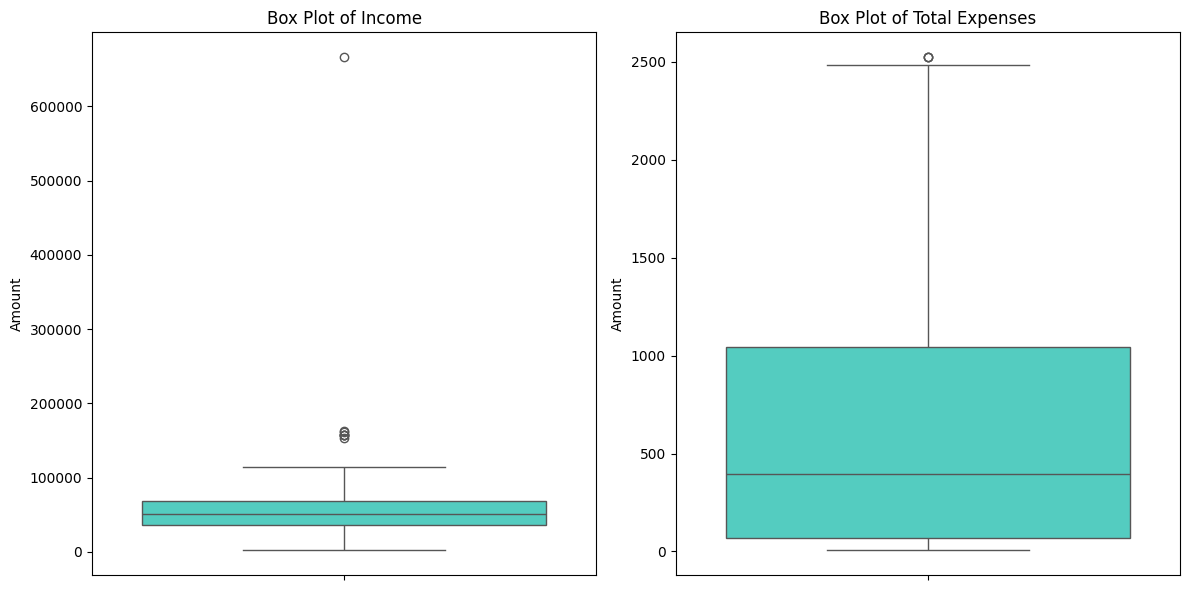

In [27]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Creating the box plot for Income
sns.boxplot(y=df['Income'], ax=axes[0], color = 'turquoise')
axes[0].set_title('Box Plot of Income')
axes[0].set_ylabel('Amount')

# Creating the box plot for Total_Expense
sns.boxplot(y=df['Total_Expenses'], ax=axes[1], color = 'turquoise')
axes[1].set_title('Box Plot of Total Expenses')
axes[1].set_ylabel('Amount')

# Displaying the plots
plt.tight_layout()
plt.show()

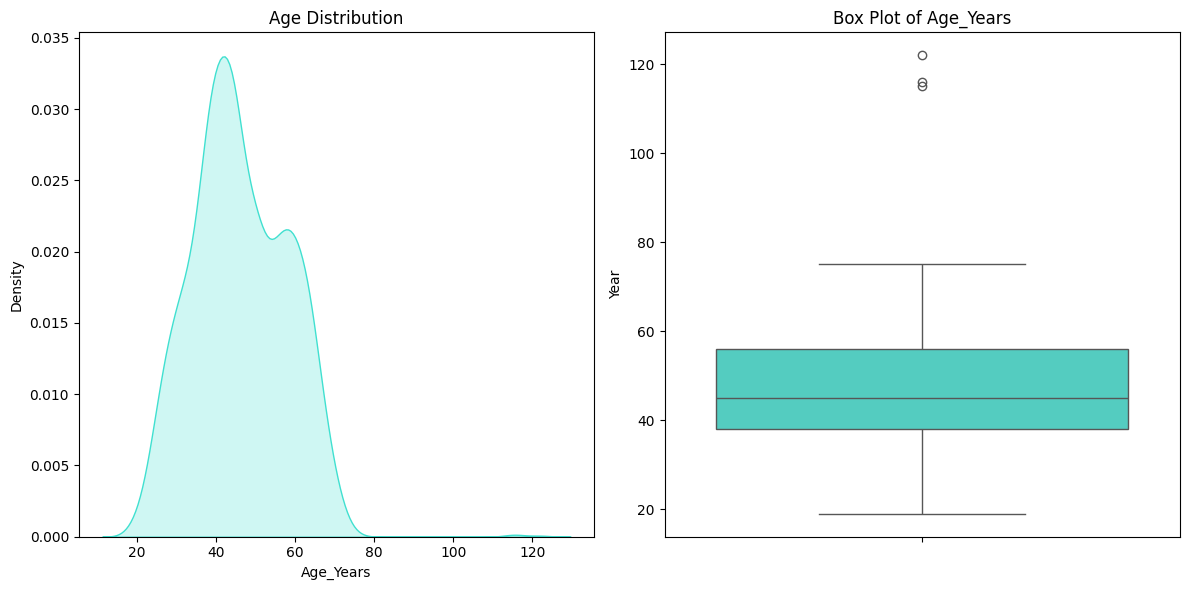

In [28]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Creating KDE plot to check the distribution of Age
sns.kdeplot(
    data=df,
    x="Age_Years",
    fill=True,
    ax=axes[0],
    color='turquoise'
)
axes[0].set_title("Age Distribution")

# Creating the box plot for Age
sns.boxplot(y=df['Age_Years'], ax=axes[1], color='turquoise')
axes[1].set_title('Box Plot of Age_Years')
axes[1].set_ylabel('Year')

# Adjusting layout to avoid overlap
plt.tight_layout()

plt.show()

##### We found that the Features **'Income'** and **'Age_Years'** have few **Outliers**.

In [30]:
# Dropping the outliers by setting a cap on Age and Income.

df = df[(df["Age_Years"]<100)]
df = df[(df["Income"]<600000)]
print("Number of Records in DataFrame after removing the Outliers :", len(df))

Number of Records in DataFrame after removing the Outliers : 2236


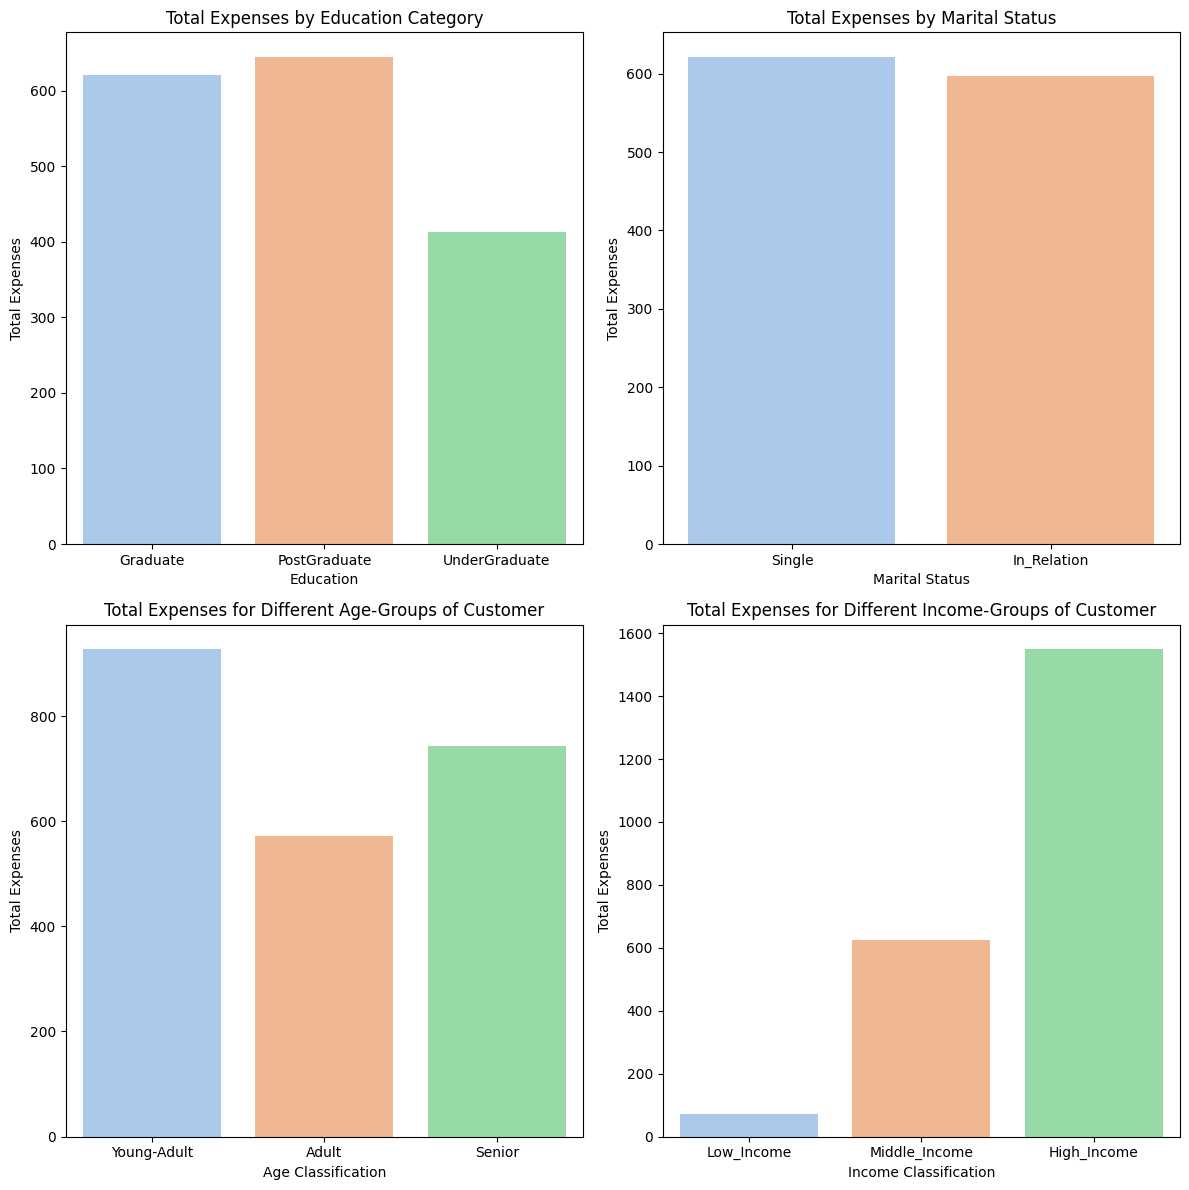

In [31]:
import warnings
warnings.filterwarnings("ignore")

# Creating a figure with Four subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Creating a Bar Chart to show Total Expenses by Education Category
sns.barplot(data=df, x='Education', y='Total_Expenses', palette='pastel', ax=axes[0, 0], ci = None)

# Adding a title and labels for the first plot
axes[0, 0].set_title('Total Expenses by Education Category')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Total Expenses')

# Creating a Bar Chart to show Total Expenses by Marital Status
sns.barplot(data=df, x='Marital_Status', y='Total_Expenses', palette='pastel', ax=axes[0, 1], ci = None)

# Adding a title and labels for the second plot
axes[0, 1].set_title('Total Expenses by Marital Status')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Total Expenses')

# Creating a Bar Chart to show Total Expenses by Different Age_Groups of Customer
sns.barplot(data=df, x='Age_Classification', y='Total_Expenses', palette='pastel', ax=axes[1, 0], ci = None)

# Adding a title and labels for the third plot
axes[1, 0].set_title('Total Expenses for Different Age-Groups of Customer')
axes[1, 0].set_xlabel('Age Classification')
axes[1, 0].set_ylabel('Total Expenses')

# Creating a Bar Chart to show Total Expenses by Different Income_Groups of Customer
sns.barplot(data=df, x='Income_Classification', y='Total_Expenses', palette='pastel', ax=axes[1, 1], ci = None)

# Adding a title and labels for the fourth plot
axes[1, 1].set_title('Total Expenses for Different Income-Groups of Customer')
axes[1, 1].set_xlabel('Income Classification')
axes[1, 1].set_ylabel('Total Expenses')

# Adjusting layout to avoid overlap
plt.tight_layout()

plt.show()

#### Key Findings :
1. Education and income levels are strong indicators of total expenses. Higher education and income correlate with higher spending.
2. Age plays a significant role. Young-Adults spend the most, followed by Seniors, while Adults spend the least.
3. Marital status does not significantly influence spending, with both Single and In a Relationship categories having similar expense levels.

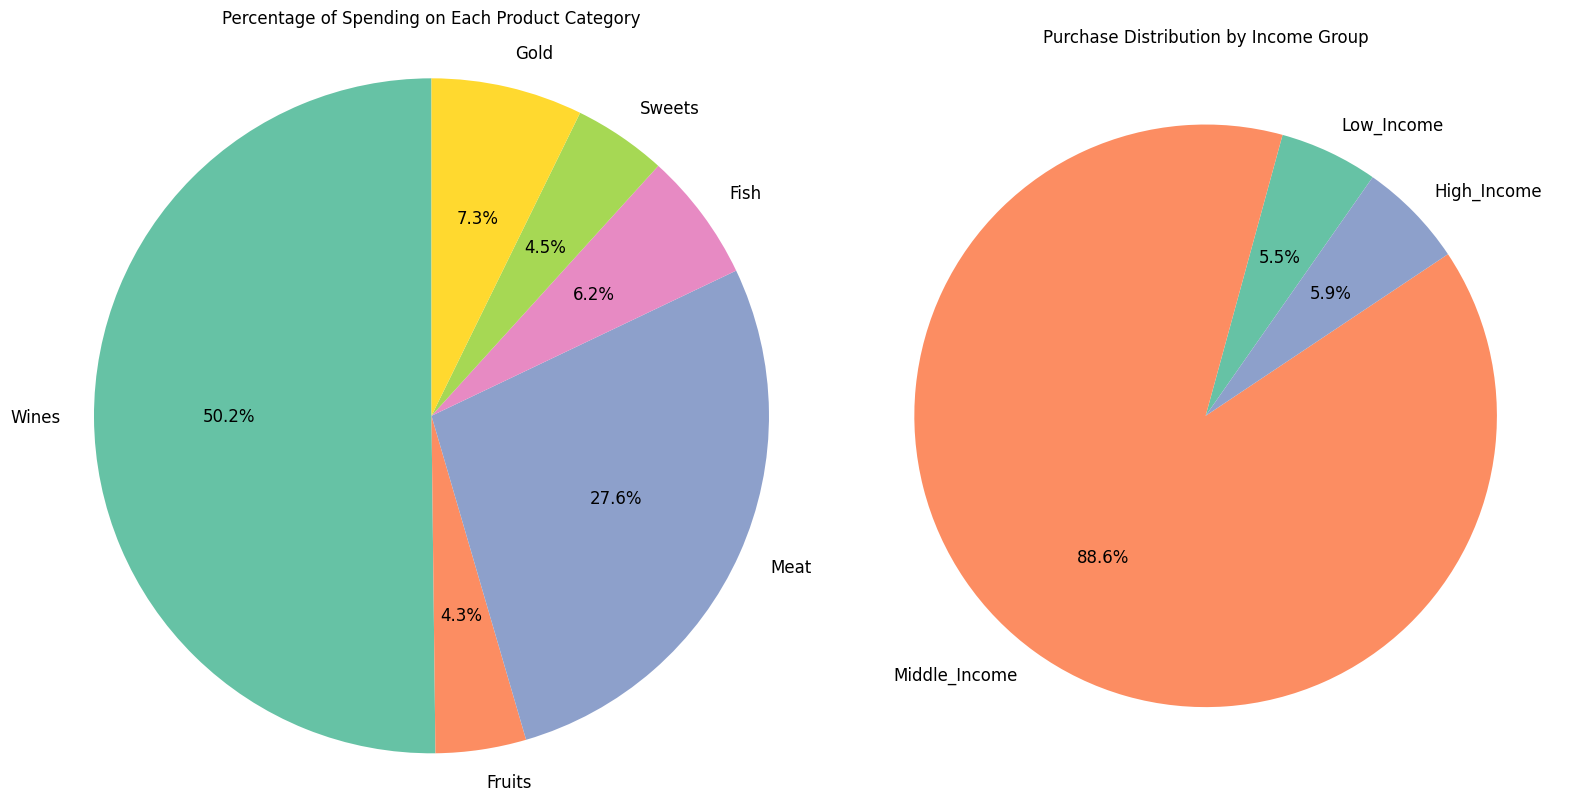

In [33]:
# define the colour palette
colors = sns.color_palette('Set2')

# Creating a figure with Two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pie Chart to show Expenses for Different Product Categories
total_spent = df['Total_Expenses'].sum()
product_categories = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
spending = [
    df['Expense_Wines'].sum() / total_spent,
    df['Expense_Fruit'].sum() / total_spent,
    df['Expense_Meat'].sum() / total_spent,
    df['Expense_Fish'].sum() / total_spent,
    df['Expense_Sweets'].sum() / total_spent,
    df['Expense_Gold'].sum() / total_spent
]

# First subplot for Spending on Product Categories
axs[0].pie(spending, labels=product_categories, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Percentage of Spending on Each Product Category', pad=20)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Creating a Pie Chart to show Count of Purchase for Different Income_Groups of Customer
Cnt_Total_Purchases = df.groupby('Income_Classification')['Cnt_Total_Purchases'].sum()
Income_Classification = Cnt_Total_Purchases.index

# Second subplot for Purchase Distribution by Income Group
axs[1].pie(Cnt_Total_Purchases, labels=Income_Classification, autopct='%1.1f%%', startangle=55, colors=colors)
axs[1].set_title('Purchase Distribution by Income Group')

# Adjust font size for pie chart labels
for ax in axs:
    texts = ax.texts
    for text in texts:
        text.set_fontsize(12)

plt.tight_layout()  # Adjust subplots to fit into figure area.

plt.show()

#### Key Findings :
The majority of customer spending is allocated to the purchase of **Wine** and **Meat**.
Notably, individuals in the **Middle-Income** group make the highest number of purchases, significantly exceeding those of other income groups.

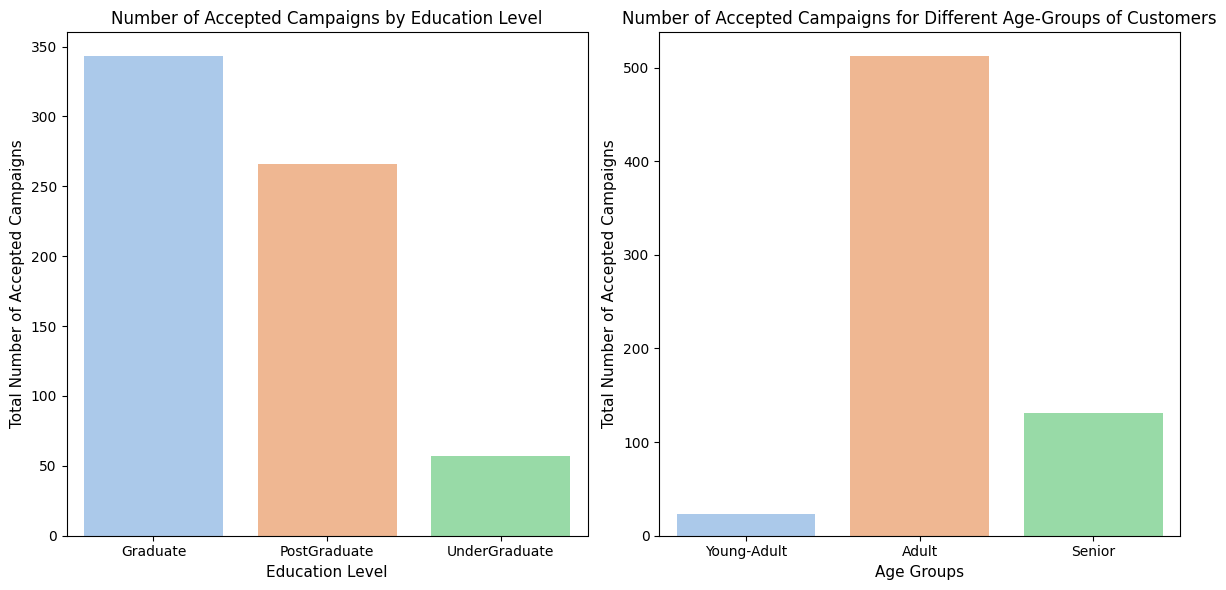

In [35]:
# Aggregate the data for Education
agg_data_education = df.groupby('Education')['Total_AcceptedCmp'].sum().reset_index()

# Aggregate the data for Age_Classification
agg_data_age = df.groupby('Age_Classification')['Total_AcceptedCmp'].sum().reset_index()

# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Education
sns.barplot(data=agg_data_education, x='Education', y='Total_AcceptedCmp', palette='pastel', ax=axes[0])
axes[0].set_title('Number of Accepted Campaigns by Education Level', fontsize=12)
axes[0].set_xlabel('Education Level', fontsize=11)
axes[0].set_ylabel('Total Number of Accepted Campaigns', fontsize=11)

# Plot for Age Classification
sns.barplot(data=agg_data_age, x='Age_Classification', y='Total_AcceptedCmp', palette='pastel', ax=axes[1])
axes[1].set_title('Number of Accepted Campaigns for Different Age-Groups of Customers', fontsize=12)
axes[1].set_xlabel('Age Groups', fontsize=11)
axes[1].set_ylabel('Total Number of Accepted Campaigns', fontsize=11)

# Adjust layout to fit all labels and titles
plt.tight_layout()

plt.show()

#### Key Findings :
1. Individuals with higher education levels (Graduates and PostGraduates) are more likely to have accepted campaigns compared to those with lower education levels (UnderGraduates).
2. Interestingly, Adults demonstrate the highest responsiveness with over 500 accepted campaigns, while Young-Adults, unusually, show the least responsiveness. Seniors exhibit moderate engagement, positioned between the two groups.

#### Suggestions :

1. Target Adults and Graduates: These demographics demonstrate the highest levels of engagement, so align your marketing strategies with their preferences.

2. Optimize Campaigns for Young Adults and Undergraduates: Modify your approach to more effectively appeal to these groups.

3. Segmented Marketing Approach: Create tailored strategies for each age group and educational background to enhance relevance and effectiveness.

4. Personalized Campaigns: Customize your marketing efforts to address the unique needs and interests of different segments.

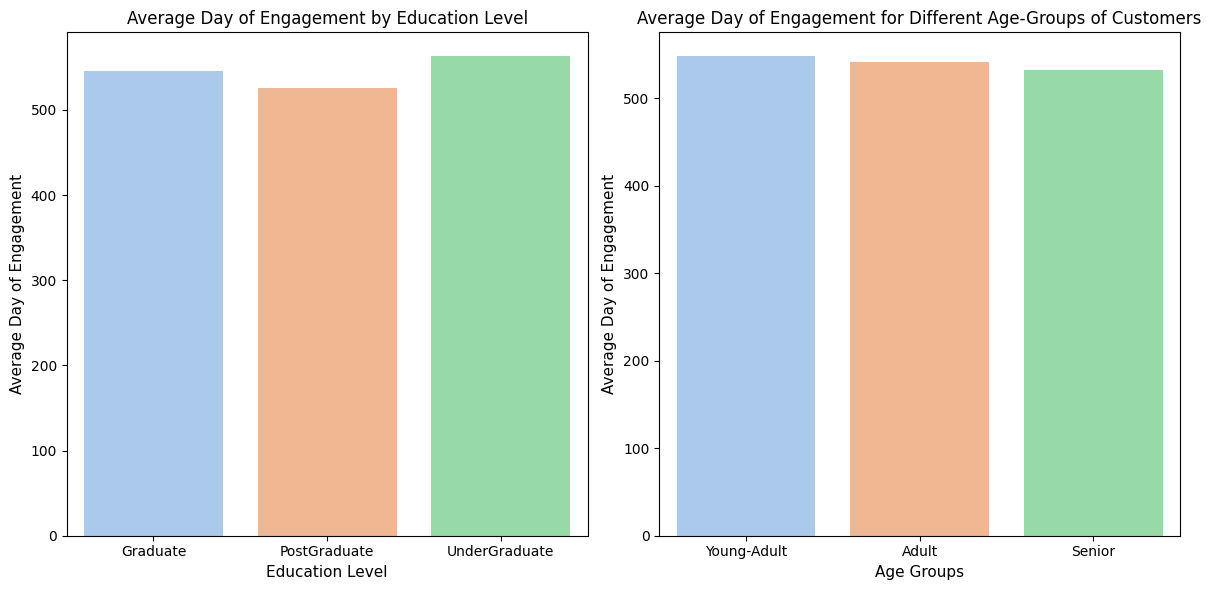

In [38]:
# Aggregate the data for Education
agg_data_education_1 = df.groupby('Education')['Engagement_Days'].mean().reset_index()

# Aggregate the data for Age_Classification
agg_data_age_1 = df.groupby('Age_Classification')['Engagement_Days'].mean().reset_index()

# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Education
sns.barplot(data=agg_data_education_1, x='Education', y='Engagement_Days', palette='pastel', ax=axes[0])
axes[0].set_title('Average Day of Engagement by Education Level', fontsize=12)
axes[0].set_xlabel('Education Level', fontsize=11)
axes[0].set_ylabel('Average Day of Engagement', fontsize=11)

# Plot for Age Classification
sns.barplot(data=agg_data_age_1, x='Age_Classification', y='Engagement_Days', palette='pastel', ax=axes[1])
axes[1].set_title('Average Day of Engagement for Different Age-Groups of Customers', fontsize=12)
axes[1].set_xlabel('Age Groups', fontsize=11)
axes[1].set_ylabel('Average Day of Engagement', fontsize=11)

# Adjust layout to fit all labels and titles
plt.tight_layout()

plt.show()

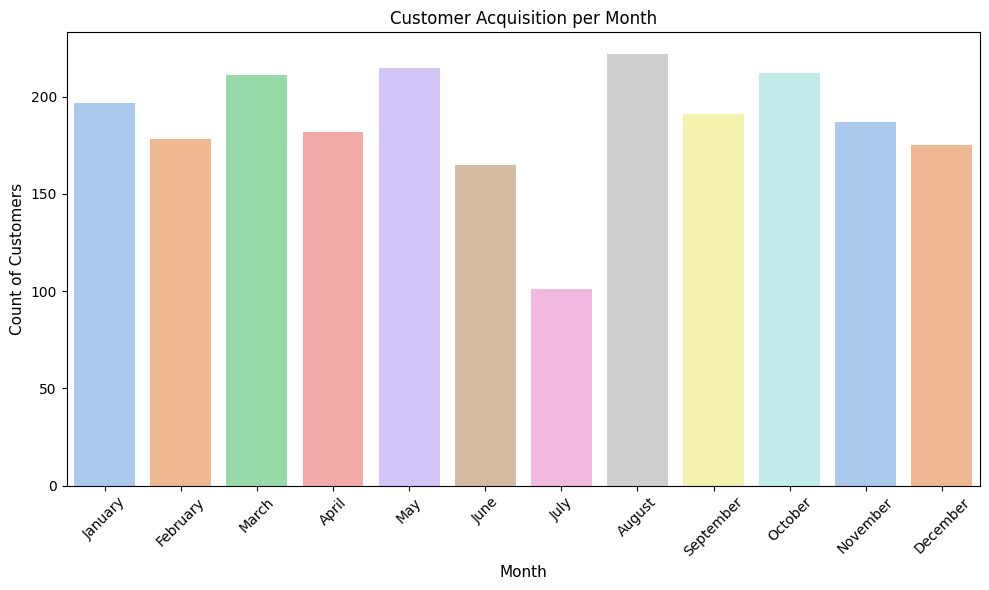

In [39]:
# Extract the month name
df["Month_Name"] = df["Dt_Customer"].dt.month_name()

# Aggregate the data to count Customer Acquisition per Month
agg_data = df.groupby("Month_Name").ID.count().reset_index(name='ID_Count')

# Sort months in calendar order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
agg_data['Month_Name'] = pd.Categorical(agg_data['Month_Name'], categories=month_order, ordered=True)
agg_data = agg_data.sort_values('Month_Name')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=agg_data, x='Month_Name', y='ID_Count', palette='pastel')

# Add title and labels
plt.title('Customer Acquisition per Month', fontsize=12)
plt.xlabel('Month', fontsize=11)
plt.ylabel('Count of Customers', fontsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit all labels and titles
plt.tight_layout()

plt.show()

#### Key Findings:
1. Peak Months: Customer acquisition is highest in March and October, indicating the effectiveness of marketing strategies or the impact of seasonal promotions during these periods.
2. Low Months: May and September experience the lowest levels of customer acquisition, highlighting the potential need for enhanced marketing efforts or strategies to neutralize seasonal downturns.
3. Consistent Performance: The remaining months exhibit moderate and relatively stable levels of customer acquisition.

In [41]:
import pandas as pd
from tabulate import tabulate

# Pivot table for Average Expense and Total Purchases by Family Size
pivot_table = df.pivot_table(
    values=['Total_Expenses', 'Cnt_Total_Purchases'],
    index='Family_Size',                      
    aggfunc={'Total_Expenses': 'mean', 'Cnt_Total_Purchases': 'sum'},
    fill_value=0,       # fill_value: Value to replace missing values
)

# Rename the columns
pivot_table.columns = ['Total No. of Purchases', 'Average Expenses']

# Set display options for better readability
pd.set_option('display.float_format', '{:.2f}'.format) 

print(tabulate(pivot_table,
               headers = 'keys',
               tablefmt = 'psql'))

+---------------+--------------------------+--------------------+
|   Family_Size |   Total No. of Purchases |   Average Expenses |
|---------------+--------------------------+--------------------|
|             1 |                     4475 |           1105.4   |
|             2 |                    12154 |            785.585 |
|             3 |                    12496 |            441     |
|             4 |                     3732 |            248.847 |
|             5 |                      398 |            308.531 |
+---------------+--------------------------+--------------------+


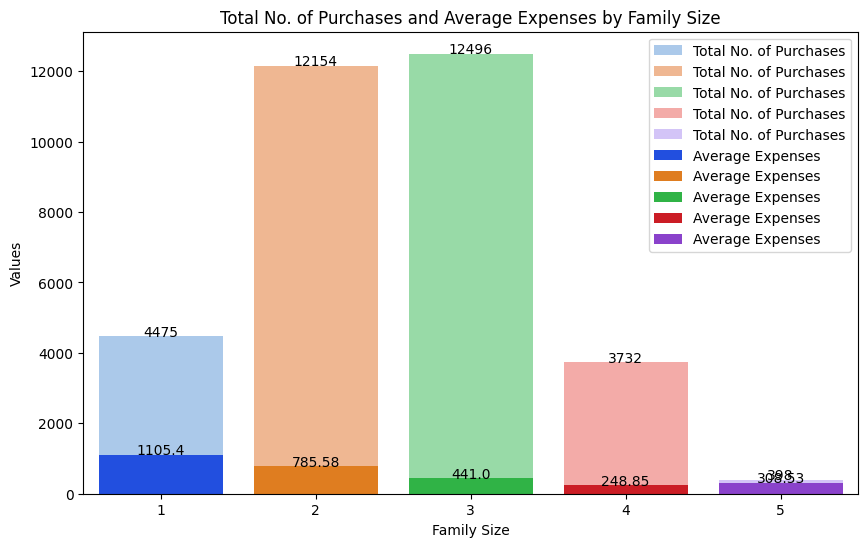

In [42]:
# Plotting the bar chart for above Pivot Table
plt.figure(figsize=(10, 6))
bar1 = sns.barplot(x=pivot_table.index, y=pivot_table['Total No. of Purchases'], palette='pastel', label='Total No. of Purchases')
bar2 = sns.barplot(x=pivot_table.index, y=pivot_table['Average Expenses'], palette='bright', label='Average Expenses')

# Adding data labels
for index, value in enumerate(pivot_table['Total No. of Purchases']):
    bar1.text(index, value, round(value, 2), color='black', ha="center")
for index, value in enumerate(pivot_table['Average Expenses']):
    bar2.text(index, value, round(value, 2), color='black', ha="center")

plt.xlabel('Family Size')
plt.ylabel('Values')
plt.title('Total No. of Purchases and Average Expenses by Family Size')
plt.legend()

plt.show()

#### Key Findings :
1. Single-member households exhibit the highest average expenditure, yet their total number of purchases is comparatively lower.
   This suggests that  they are likely investing in higher-value items.
2. Families with 2 and 3 members make the most purchases, suggesting they are a key target for frequent, possibly lower-value transactions.
3. Families with 4 and 5 members have fewer purchases and lower average expenses, indicating a potential area for targeted marketing to increase
   engagement.

In [44]:
# Make a copy of Original DataFrame
df_copy = df.copy()

In [45]:
# Droping Irrelevant Columns
df_copy.drop(
    ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Cust_Description',
     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
     'Expense_Wines', 'Expense_Fruit', 'Expense_Meat', 'Expense_Fish', 'Expense_Sweets', 'Expense_Gold',
     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'Is_Parent',
     'Month_Name', 'Income_Classification', 'Age_Classification'],
    axis=1, inplace=True)

print("List of Columns in Copied_DataFrame :\n",df_copy.columns)
print("\nShape of Copied_DataFrame :",df_copy.shape)

List of Columns in Copied_DataFrame :
 Index(['Education', 'Marital_Status', 'Income', 'NumWebVisitsMonth',
       'Complain', 'Engagement_Days', 'Age_Years', 'Total_Children',
       'Total_Expenses', 'Total_AcceptedCmp', 'Cnt_Total_Purchases',
       'Family_Size'],
      dtype='object')

Shape of Copied_DataFrame : (2236, 12)


In [46]:
from IPython.display import display

# Adjust the display setting to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(df_copy.head(10))

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Engagement_Days,Age_Years,Total_Children,Total_Expenses,Total_AcceptedCmp,Cnt_Total_Purchases,Family_Size
0,Graduate,Single,58138.00,7,0,849,58,0,1617,0,25,1
1,Graduate,Single,46344.00,5,0,299,61,2,27,0,6,3
2,Graduate,In_Relation,71613.00,4,0,498,50,0,776,0,21,2
3,Graduate,In_Relation,26646.00,6,0,325,31,1,53,0,8,3
4,PostGraduate,In_Relation,58293.00,5,0,347,34,1,422,0,19,3
5,PostGraduate,In_Relation,62513.00,6,0,479,48,1,716,0,22,3
6,Graduate,Single,55635.00,6,0,779,44,1,590,0,21,2
7,PostGraduate,In_Relation,33454.00,8,0,603,30,1,169,0,10,3
8,PostGraduate,In_Relation,30351.00,9,0,574,41,1,46,0,6,3
9,PostGraduate,In_Relation,5648.00,20,0,294,65,2,49,1,2,4


In [47]:
# Checking the Data Types of all Features
df_copy.dtypes

Education               object
Marital_Status          object
Income                 float64
NumWebVisitsMonth        int64
Complain                 int64
Engagement_Days          int64
Age_Years                int64
Total_Children           int64
Total_Expenses           int64
Total_AcceptedCmp        int64
Cnt_Total_Purchases      int64
Family_Size              int64
dtype: object

In [48]:
# Checking Unique Values in each Column
df_copy.nunique()

Education                 3
Marital_Status            2
Income                 1971
NumWebVisitsMonth        16
Complain                  2
Engagement_Days         663
Age_Years                56
Total_Children            4
Total_Expenses         1054
Total_AcceptedCmp         5
Cnt_Total_Purchases      39
Family_Size               5
dtype: int64

In [49]:
# Making two individual list of Categorical and Numerical Features
categorical_columns = []
numerical_columns = []

for column in df_copy.columns:
    unique_values = df_copy[column].nunique()
    dtype = df_copy[column].dtype
    # Check conditions:
    if (dtype == 'object' or dtype == 'category') and unique_values <= 10:
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical Features: ", categorical_columns)
print("\nNumerical Features: ", numerical_columns)

Categorical Features:  ['Education', 'Marital_Status']

Numerical Features:  ['Income', 'NumWebVisitsMonth', 'Complain', 'Engagement_Days', 'Age_Years', 'Total_Children', 'Total_Expenses', 'Total_AcceptedCmp', 'Cnt_Total_Purchases', 'Family_Size']


#### **Featute Encoding**

In [51]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df_copy['Marital_Status_Encoded'] = label_encoder.fit_transform(df_copy['Marital_Status'])

# Define the categories for Education column
categories = [
    ['UnderGraduate', 'Graduate', 'PostGraduate']
]

# Initialize the OrdinalEncoder with the defined categories
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the specified columns
df_copy[['Education_Encoded']] = ordinal_encoder.fit_transform(df[['Education']])

In [52]:
df_copy.sample(5)

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Engagement_Days,Age_Years,Total_Children,Total_Expenses,Total_AcceptedCmp,Cnt_Total_Purchases,Family_Size,Marital_Status_Encoded,Education_Encoded
1312,PostGraduate,In_Relation,45143.00,7,0,493,50,1,311,0,15,3,0,2.00
97,Graduate,Single,51813.00,7,0,630,43,2,63,0,7,3,1,1.00
1552,Graduate,In_Relation,63943.00,5,0,851,59,1,1106,0,17,3,0,1.00
14,Graduate,In_Relation,17323.00,8,0,813,28,0,46,0,5,2,0,1.00
203,PostGraduate,In_Relation,102160.00,4,0,790,38,0,1240,3,26,2,0,2.00


In [53]:
# Make another copy of previoiusly copied DataFrame
df_copy_1 = df_copy.copy()

##### As we **Encoded** the *Categorical* features so we can Drop those features

In [55]:
# Droping Categorical Columns
df_copy_1.drop(
    ['Marital_Status', 'Education'], axis=1, inplace=True)

print("List of Columns after Droping the Categorical Features from the DataFrame :\n",df_copy_1.columns)
print("\nShape of Copied_DataFrame :",df_copy_1.shape)

List of Columns after Droping the Categorical Features from the DataFrame :
 Index(['Income', 'NumWebVisitsMonth', 'Complain', 'Engagement_Days',
       'Age_Years', 'Total_Children', 'Total_Expenses', 'Total_AcceptedCmp',
       'Cnt_Total_Purchases', 'Family_Size', 'Marital_Status_Encoded',
       'Education_Encoded'],
      dtype='object')

Shape of Copied_DataFrame : (2236, 12)


#### **Feature Scaling**

In [57]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_copy_1)
scaled_df = pd.DataFrame(standard_scaler.transform(df_copy_1),columns= df_copy_1.columns )
print("All features are now scaled")

print("\nScaled Dataframe to be used for modelling:")
scaled_df.head(10)

All features are now scaled

Scaled Dataframe to be used for modelling:


,Income,NumWebVisitsMonth,Complain,Engagement_Days,Age_Years,Total_Children,Total_Expenses,Total_AcceptedCmp,Cnt_Total_Purchases,Family_Size,Marital_Status_Encoded,Education_Encoded
0,0.29,0.69,-0.10,1.53,1.02,-1.26,1.68,-0.44,1.32,-1.76,1.35,-0.41
1,-0.26,-0.13,-0.10,-1.19,1.27,1.40,-0.96,-0.44,-1.16,0.45,1.35,-0.41
2,0.92,-0.54,-0.10,-0.21,0.33,-1.26,0.28,-0.44,0.80,-0.66,-0.74,-0.41
3,-1.18,0.28,-0.10,-1.06,-1.29,0.07,-0.92,-0.44,-0.90,0.45,-0.74,-0.41
4,0.30,-0.13,-0.10,-0.95,-1.03,0.07,-0.31,-0.44,0.54,0.45,-0.74,1.12
5,0.49,0.28,-0.10,-0.30,0.16,0.07,0.18,-0.44,0.93,0.45,-0.74,1.12
6,0.17,0.28,-0.10,1.18,-0.18,0.07,-0.03,-0.44,0.80,-0.66,1.35,-0.41
7,-0.86,1.11,-0.10,0.31,-1.38,0.07,-0.73,-0.44,-0.63,0.45,-0.74,1.12
8,-1.01,1.52,-0.10,0.17,-0.44,0.07,-0.93,-0.44,-1.16,0.45,-0.74,1.12
9,-2.16,6.05,-0.10,-1.22,1.62,1.40,-0.93,1.03,-1.68,1.55,-0.74,1.12


#### Dimensionality reduction with **PCA**

In [59]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col_1","col_2", "col_3"]))
PCA_df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
col_1,2236.00,-0.00,1.92,-4.80,-1.60,-0.38,1.44,5.80
col_2,2236.00,0.00,1.31,-4.01,-0.84,-0.00,0.96,4.22
col_3,2236.00,0.00,1.13,-2.76,-0.86,-0.03,0.88,4.16


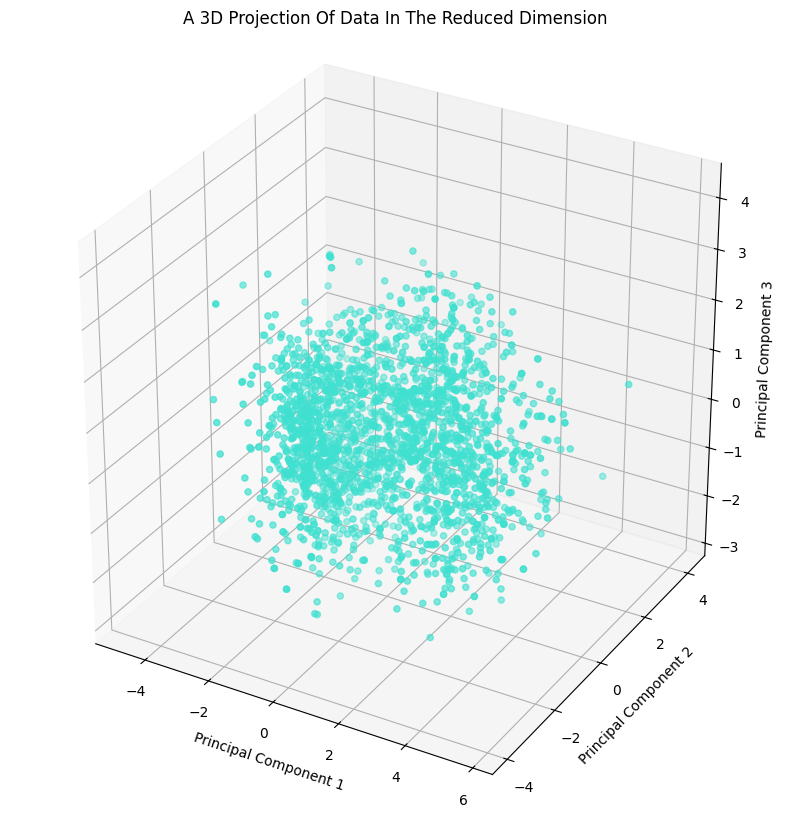

In [60]:
# 3D Projection Of Data in the Reduced Dimension

from mpl_toolkits.mplot3d import Axes3D

x = PCA_df["col_1"]
y = PCA_df["col_2"]
z = PCA_df["col_3"]

# To plot
fig = plt.figure(figsize=(10,10))  # Adjusted figure size
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="turquoise", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

# Adding axis labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax.set_box_aspect([1,1,1])  # Aspect ratio is 1:1:1

plt.show()

### K-Means Clustering

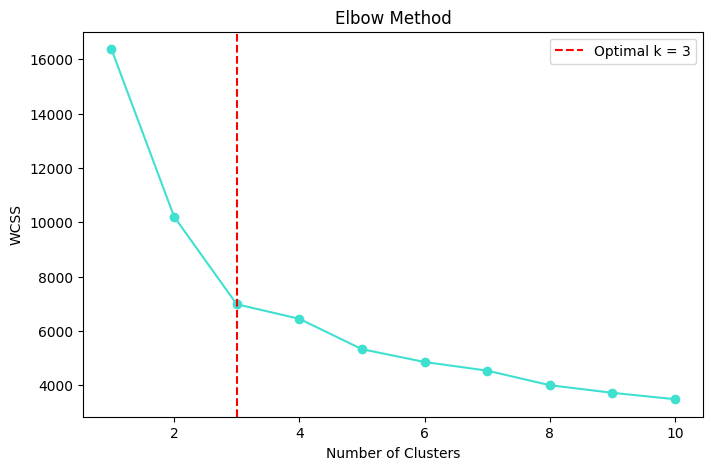

In [145]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to determine optimal K i.e. Optimal number of Clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', c="turquoise")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Draw a dashed line for the optimal number of clusters
optimal_k = 3
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()

plt.show()

In [146]:
# Define the range of clusters to test
range_n_clusters = range(2, 11)

# Initialize a dictionary to store silhouette scores
silhouette_scores = {}

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    
    # Fit the model and predict clusters
    cluster_labels = kmeans.fit_predict(PCA_df)
    
    # Calculate the silhouette score
    score = silhouette_score(PCA_df, cluster_labels, metric="euclidean", sample_size=1000, random_state=42)
    
    # Store the score in the dictionary
    silhouette_scores[n_clusters] = score
    
    print(f'Silhouette Score for k(Clusters) {n_clusters} is: {score}')

Silhouette Score for k(Clusters) 2 is: 0.35005575513190046
Silhouette Score for k(Clusters) 3 is: 0.3895279393721264
Silhouette Score for k(Clusters) 4 is: 0.3267632326262003
Silhouette Score for k(Clusters) 5 is: 0.2963680627662094
Silhouette Score for k(Clusters) 6 is: 0.27018169614789844
Silhouette Score for k(Clusters) 7 is: 0.2626867339917314
Silhouette Score for k(Clusters) 8 is: 0.25734650326233033
Silhouette Score for k(Clusters) 9 is: 0.2654076482091139
Silhouette Score for k(Clusters) 10 is: 0.2646126446937895


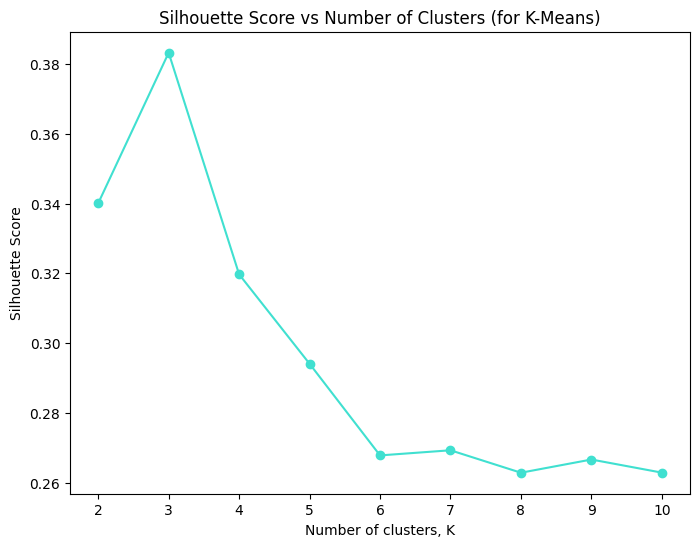

In [147]:
# Plot of Silhouette Scores for K number of Clusters
import warnings
warnings.filterwarnings('ignore')

# Plot silhouette score vs K
silhouette_scores = []
K = range(2, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(PCA_df)
    silhouette_avg = silhouette_score(PCA_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-', c="turquoise")
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (for K-Means)')

plt.show()

### **Agglomerative Hierarchical Clustering**

In [149]:
# Define the range of clusters to test
range_n_clusters = range(2, 11)

# Initialize a dictionary to store silhouette scores
silhouette_scores = {}

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize the Agglomerative Clustering model
    AC_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    
    # Fit the model and predict clusters
    yhat_AC = AC_model.fit_predict(PCA_df)
    
    # Calculate the silhouette score
    score = silhouette_score(PCA_df, yhat_AC)
    
    # Store the score in the dictionary
    silhouette_scores[n_clusters] = score
    
    print(f'For n_clusters = {n_clusters}, the silhouette score is {score}')

For n_clusters = 2, the silhouette score is 0.33648192810804206
For n_clusters = 3, the silhouette score is 0.37733978686338876
For n_clusters = 4, the silhouette score is 0.31156982066755085
For n_clusters = 5, the silhouette score is 0.272144282235169
For n_clusters = 6, the silhouette score is 0.23333536767745397
For n_clusters = 7, the silhouette score is 0.21782448982571323
For n_clusters = 8, the silhouette score is 0.22422596841356818
For n_clusters = 9, the silhouette score is 0.21924287672424494
For n_clusters = 10, the silhouette score is 0.2239956129584393


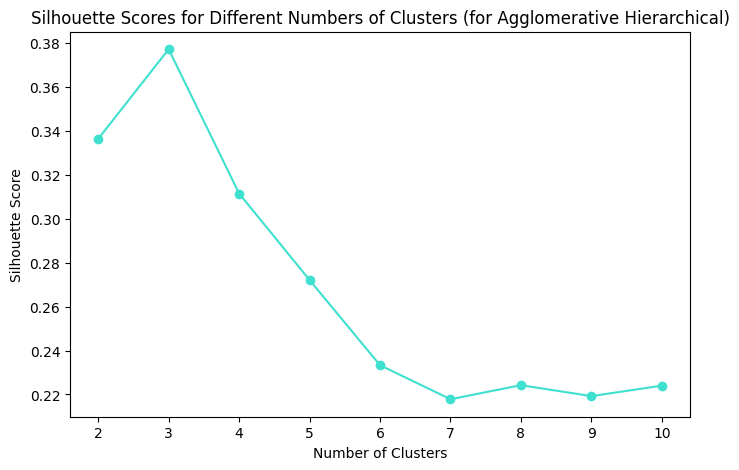

In [150]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='turquoise')
plt.title('Silhouette Scores for Different Numbers of Clusters (for Agglomerative Hierarchical)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

#### Based on the **Elbow** method and the **Silhouette Score** for both K-Means and Agglomerative Hierarchical Clustering, it is evident that the **Optimal Number of Clusters** is **3**.

### Grouping the data points using the K-Means Clustering method

Silhouette Score: 0.38320474632573553


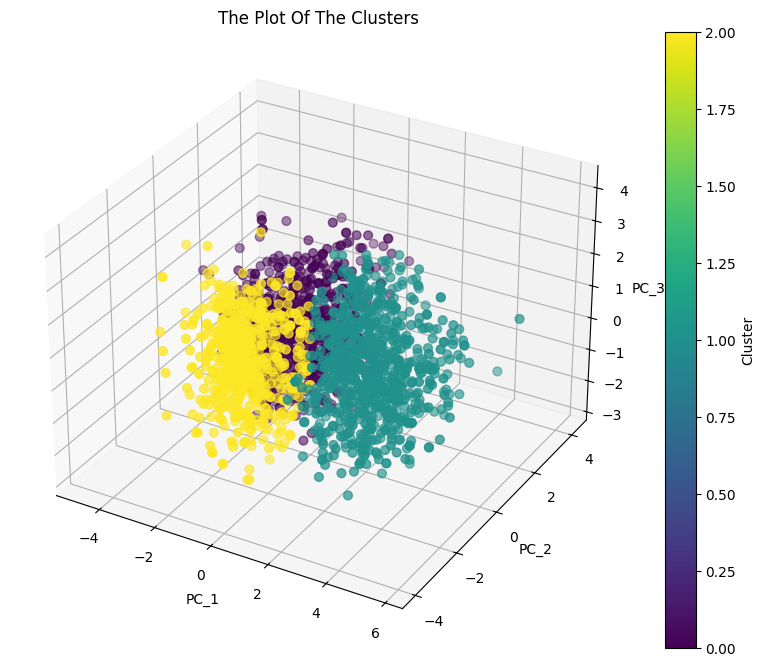

In [153]:
#Initiating the Agglomerative Clustering model 
# AC_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

#Initiating the K-Means Clustering model 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# fit model and predict clusters

# yhat_AC = AC_model.fit_predict(PCA_df)
# PCA_df["Clusters"] = yhat_AC

yhat_KM = kmeans.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_KM

# Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_KM

# Calculate the silhouette score
score = silhouette_score(PCA_df, yhat_KM)
print(f'Silhouette Score: {score}')

# Plotting the clusters
from mpl_toolkits.mplot3d import Axes3D

# Define colormap
cmap = plt.get_cmap('viridis')

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')
plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

In [154]:
from IPython.display import display

# Adjust the display setting to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(df.head(10))
print("\nAfter Adding some Calculative Features and Cluster Lebels, the Shape of the Original DataFrame now become :",df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Expense_Wines,Expense_Fruit,Expense_Meat,Expense_Fish,Expense_Sweets,Expense_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Engagement_Days,Age_Years,Age_Classification,Total_Children,Total_Expenses,Total_AcceptedCmp,Cnt_Total_Purchases,Income_Classification,Cust_Description,Family_Size,Is_Parent,Month_Name,Clusters
0,5524,1957,Graduate,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,849,58,Adult,0,1617,0,25,Middle_Income,Adult-Middle_Income,1,0,September,1
1,2174,1954,Graduate,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,299,61,Senior,2,27,0,6,Middle_Income,Senior-Middle_Income,3,1,March,0
2,4141,1965,Graduate,In_Relation,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,498,50,Adult,0,776,0,21,Middle_Income,Adult-Middle_Income,2,0,August,1
3,6182,1984,Graduate,In_Relation,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,325,31,Adult,1,53,0,8,Middle_Income,Adult-Middle_Income,3,1,February,2
4,5324,1981,PostGraduate,In_Relation,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,347,34,Adult,1,422,0,19,Middle_Income,Adult-Middle_Income,3,1,January,0
5,7446,1967,PostGraduate,In_Relation,62513.00,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,479,48,Adult,1,716,0,22,Middle_Income,Adult-Middle_Income,3,1,September,0
6,965,1971,Graduate,Single,55635.00,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,779,44,Adult,1,590,0,21,Middle_Income,Adult-Middle_Income,2,1,November,2
7,6177,1985,PostGraduate,In_Relation,33454.00,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,603,30,Adult,1,169,0,10,Middle_Income,Adult-Middle_Income,3,1,May,2
8,4855,1974,PostGraduate,In_Relation,30351.00,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,574,41,Adult,1,46,0,6,Middle_Income,Adult-Middle_Income,3,1,June,2
9,5899,1950,PostGraduate,In_Relation,5648.00,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,294,65,Senior,2,49,1,2,Low_Income,Senior-Low_Income,4,1,March,0



After Adding some Calculative Features and Cluster Lebels, the Shape of the Original DataFrame now become : (2236, 40)


### **Evaluating** and **Profiling** of the Model

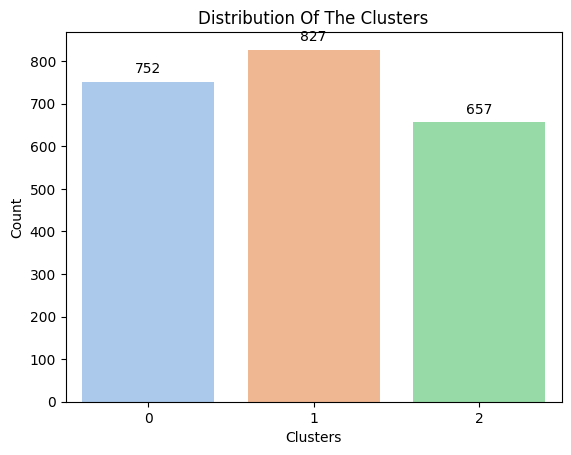


The data points are evenly distributed across the clusters.



In [156]:
import warnings
warnings.filterwarnings("ignore")

# Plotting the bar chart of each Cluster
plot = sns.barplot(x=df["Clusters"].value_counts().index, 
                   y=df["Clusters"].value_counts().values, 
                   palette='pastel')
plot.set_title("Distribution Of The Clusters")
plot.set_xlabel("Clusters")
plot.set_ylabel("Count")

# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 9), 
                  textcoords='offset points')
plt.show()

print("\nThe data points are evenly distributed across the clusters.\n")

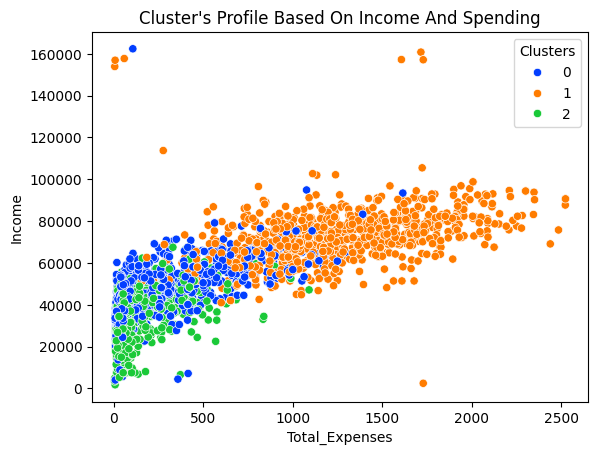

In [157]:
# Relation between Total_Expense and Income for each Cluster

plot = sns.scatterplot(data=df, x="Total_Expenses", y="Income", hue="Clusters", palette='bright')
plot.set_title("Cluster's Profile Based On Income And Spending")
plot.legend(title='Clusters')

plt.show()

#### Key Findings :
**Cluster 0(Blue)** : Low to Moderate Income, Expense is also lower side.

This cluster likely represents individuals with limited financial resources, both in terms of income and spending.

**Cluster 1(Orange)** : High Income, Expense is also higher side.

This cluster includes individuals with high expenses across various income levels.

**Cluster 2(Green)** : Low Income, Low Expense

Individuals in this cluster have Low incomes as well as they spend much less compare to other clusters.


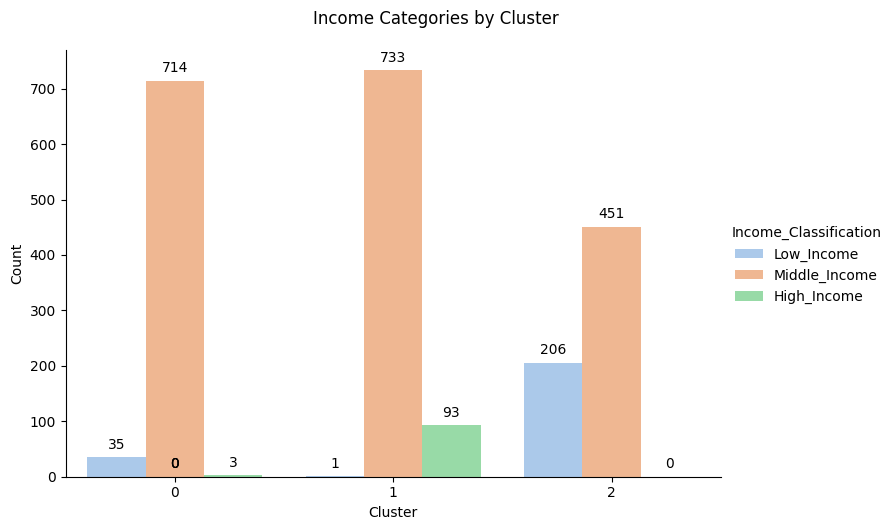

In [159]:
# Count the occurrences of each income category in each cluster

count_data = df.groupby(['Clusters', 'Income_Classification']).size().reset_index(name='count')

# Set the pastel color palette
sns.set_palette("pastel")

# Plotting
plot = sns.catplot(
    data=count_data, 
    x='Clusters', 
    y='count', 
    hue='Income_Classification', 
    kind='bar',
    palette="pastel",
    height=5, 
    aspect=1.5
)
plot.set_axis_labels('Cluster', 'Count')
plot.fig.suptitle('Income Categories by Cluster', y=1.05) 

# Add data labels
for ax in plot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

plt.show()

#### Key Findings :
The chart indicates that Middle-Income individuals are prevalent across all clusters. However, Cluster 2 has a smaller number of Middle-Income individuals compared to the other clusters. Notably, Cluster 2 is the only cluster that includes higher number of Low-Income individuals and lacks High-Income individuals. High-Income individuals are limited across all clusters, with only 93 individuals in Cluster 2 falling into the High-Income category.

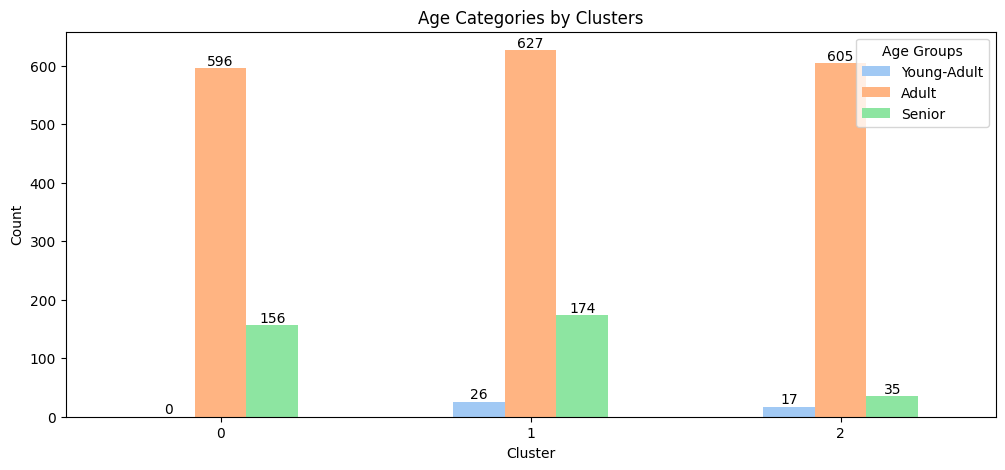

In [161]:
# Count occurrences of each age group within each cluster

count_df = df.groupby(['Clusters', 'Age_Classification']).size().unstack(fill_value=0)

# Set the pastel color palette
sns.set_palette("pastel")

# Plotting
ax = count_df.plot(kind='bar', figsize=(12, 5), color=sns.color_palette("pastel"))

plt.title('Age Categories by Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Groups')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.show()

#### Key Findings :
The distribution of age categories across all clusters shows that most customers fall into the Adult or Middle-Age categories.

There are very few individuals in the Young-Adult category, and they are found only in Cluster 1 and Cluster 2, with Cluster 0 having no Young-Adults.

Only Cluster 0 and Cluster 1 have a moderate number of Senior individuals.

In [163]:
from IPython.display import display

# Adjust the display setting to show all columns
pd.set_option('display.max_columns', None)

# Create the pivot table
pivot_table_1 = pd.pivot_table(df, 
                             index='Clusters', 
                             columns='Cust_Description', 
                             aggfunc='size', 
                             fill_value=0)

# Display the Pivot Table
display(pivot_table_1)

Cust_Description,Adult-High_Income,Adult-Low_Income,Adult-Middle_Income,Senior-High_Income,Senior-Low_Income,Senior-Middle_Income,Young-Adult-High_Income,Young-Adult-Low_Income,Young-Adult-Middle_Income
Clusters,,,,,,,,,
0,2,32,562,1,3,152,0,0,0
1,71,1,555,14,0,160,8,0,18
2,0,191,414,0,7,28,0,8,9


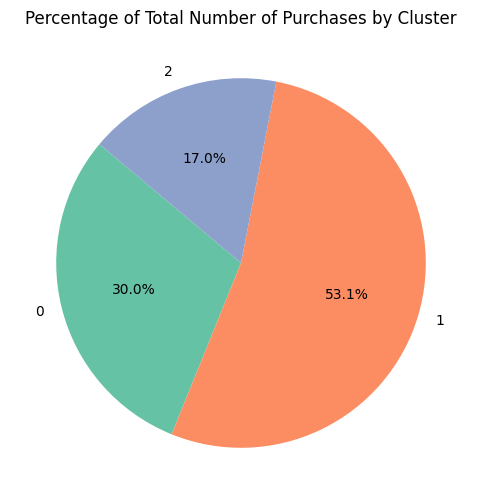

In [164]:
# Percentage of No. of Purchases for each Cluster
# Aggregate data by cluster
purchase_by_cluster = df.groupby('Clusters')['Cnt_Total_Purchases'].sum()

# define the colour palette
colors = sns.color_palette('Set2')

# Plot pie chart
plt.figure(figsize=(8, 6))
purchase_by_cluster.plot.pie(autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Total Number of Purchases by Cluster')
plt.ylabel('')  # Hide the y-label

plt.show()

#### Key Insights :
The pie chart clearly shows that individuals in Cluster 1 have the highest number of purchases, indicating they buy more frequently than those in Cluster 0. Meanwhile, individuals in Cluster 2 have the fewest purchases compared to the other clusters.

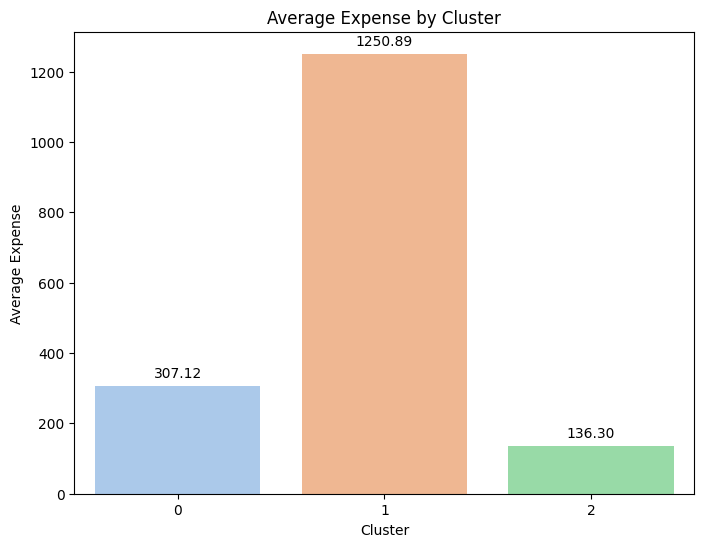

In [166]:
# Calculate the average expense for each cluster
avg_expense = df.groupby('Clusters')['Total_Expenses'].mean().reset_index()

# Set the pastel color palette
sns.set_palette("pastel")

# Plotting
plt.figure(figsize=(8, 6)) 
plot = sns.barplot(
    data=avg_expense, 
    x='Clusters', 
    y='Total_Expenses', 
    palette="pastel"
)
plt.title('Average Expense by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Expense')

# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 9), 
                  textcoords='offset points')

plt.show()


#### Key Insights :
Individuals in Cluster 1 spend significantly more, as this cluster includes High-Income people. In contrast, individuals in Cluster 2 spend less compared to those in other clusters as this cluster includes Low-Income individuals.

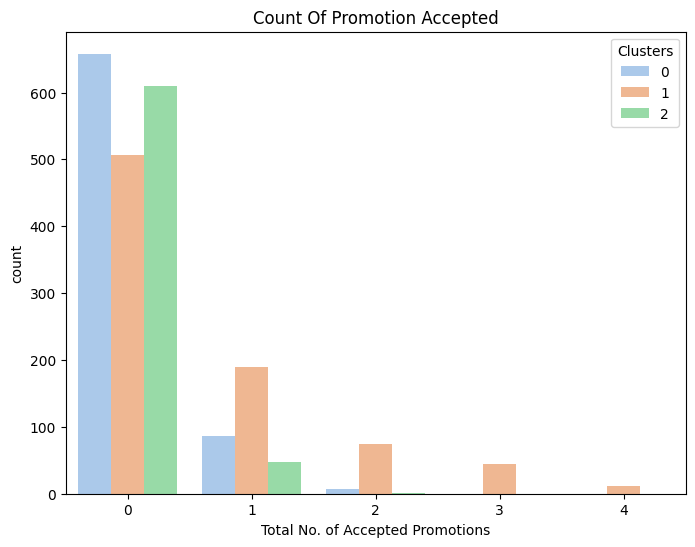

In [168]:
# Plotting count of total campaign accepted.
plt.figure(figsize=(8, 6))
plot = sns.countplot(x=df["Total_AcceptedCmp"],hue=df["Clusters"], palette= 'pastel')
plot.set_title("Count Of Promotion Accepted")
plot.set_xlabel("Total No. of Accepted Promotions")

plt.show()

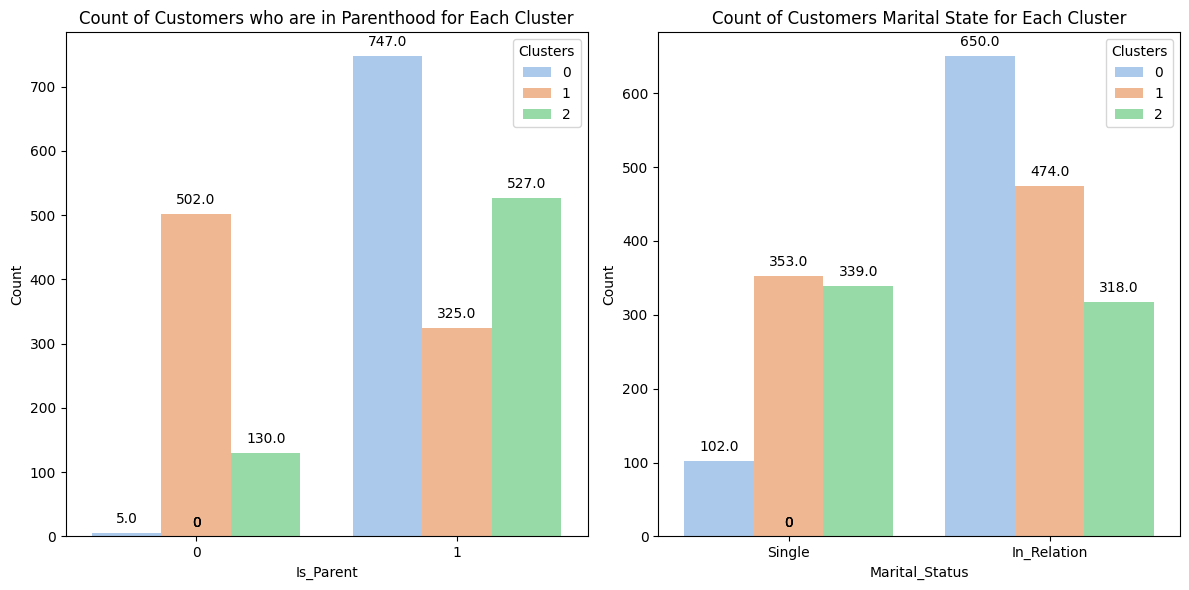

In [169]:
import warnings
warnings.filterwarnings("ignore")

# Creating a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Creating the Bar Chart for 'Is_Parent'
sns.countplot(ax=axes[0], x='Is_Parent', hue='Clusters', data=df, palette='pastel')

# Adding a title and labels for the first plot
axes[0].set_title('Count of Customers who are in Parenthood for Each Cluster')
axes[0].set_xlabel('Is_Parent')
axes[0].set_ylabel('Count')

# Adding data labels for 'Is_Parent'
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Creating the Bar Chart for 'Marital_Status'
sns.countplot(ax=axes[1], x='Marital_Status', hue='Clusters', data=df, palette='pastel')

# Adding a title and labels for the second plot
axes[1].set_title('Count of Customers Marital State for Each Cluster')
axes[1].set_xlabel('Marital_Status')
axes[1].set_ylabel('Count')

# Adding data labels for 'Marital_Status'
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjusting layout to avoid overlap
plt.tight_layout()

plt.show()

#### Key Insights:
Cluster 0 has a significantly higher number of parents compared to non-parents.
Clusters 1 and 2 have a more balanced distribution between parents and non-parents, but still show a higher number of parents.

In Cluster 2, both marital status categories are evenly distributed. Cluster 0 has the fewest customers in the "Single" category. Cluster 1 shows an equal distribution between the two categories, although more individuals in Cluster 1 are in the "In_Relation" category.

## **Cluster Profiling** 
#### (based on all the **Insights** that we found)

### Cluster 0: Low to Moderate Income, Lower Expenses
- **Income and Expenses**: Individuals in this cluster have low to moderate incomes and correspondingly lower expenses.
- **Age Distribution**: Predominantly adults and middle-aged individuals. No young adults and a moderate number of seniors.
- **Purchasing Behavior**: Moderate number of purchases, indicating a balanced but cautious spending pattern.
- **Parental Status**: Higher number of parents compared to non-parents.
- **Marital Status**: Fewest customers in the "Single" category, indicating a higher proportion of individuals in relationships.

### Cluster 1: High Income, Higher Expenses
- **Income and Expenses**: This cluster includes individuals with high incomes and high expenses.
- **Age Distribution**: Includes adults, middle-aged, and a moderate number of seniors. Some young adults are also present.
- **Purchasing Behavior**: Highest number of purchases, indicating frequent buying behavior.
- **Parental Status**: Balanced distribution between parents and non-parents, but still a higher number of parents.
- **Marital Status**: Equal distribution between "Single" and "In_Relation" categories, with a slight tilt towards individuals in relationships.

### Cluster 2: Low Income, Low Expenses
- **Income and Expenses**: Individuals in this cluster have low incomes and spend less compared to other clusters.
- **Age Distribution**: Predominantly adults and middle-aged individuals. Few young adults and no seniors.
- **Purchasing Behavior**: Fewest purchases, indicating minimal spending.
- **Parental Status**: Balanced distribution between parents and non-parents.
- **Marital Status**: Even distribution between "Single" and "In_Relation" categories.

### Key Observations:
- **Middle-Income Individuals**: Prevalent across all clusters, but fewer in Cluster 2.
- **High-Income Individuals**: Limited across all clusters, with only 93 individuals in Cluster 2.
- **Age Categories**: Most customers are adults or middle-aged. Few young adults, mainly in Clusters 1 and 2. Seniors are present in Clusters 0 and 1.
- **Purchasing Behavior**: Cluster 1 has the highest number of purchases, while Cluster 2 has the fewest.
- **Spending Patterns**: Cluster 1 spends the most, while Cluster 2 spends the least.
- **Parental Status**: Cluster 0 has more parents, while Clusters 1 and 2 have a balanced distribution.
- **Marital Status**: Cluster 0 has the fewest singles, while Cluster 1 has an equal distribution but more individuals in relationships.

#### **Exporting** the Modified DataFrame as **Excel File** to the Local System's Desired Path

In [ ]:
# Specify the full path
file_path = 'C:/Users/sangl/Clustering_CaseStudy_Customer_Personality_Analysis_KM_3_Clusters.xlsx'

# Export DataFrame to Excel file
df.to_excel(file_path, index=False)

print('DataFrame is written to Excel File successfully at:', file_path)